In [1]:
import pandas as pd #Manipulación de datos
import numpy as np #Calculos de Matrices y Vectores
import matplotlib.pyplot as pt #Creación de Gráficos
import requests as rq #Manejo y Capturacion de datos Html
import os #Manejo de Archivos Drive

In [2]:
pd.set_option("display.precision",2)

In [11]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/'
else:
  dir = 'Data/'
  
os.listdir(dir) 

['bank.zip', 'bank-additional.zip', 'bank', 'bank-additional', 'insurance.csv']

In [13]:
archivo = f'{dir}insurance.csv'
data = pd.read_csv(archivo, sep=',', decimal='.', encoding='utf-8')


In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [15]:
data.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [21]:
# Mapeo para la variable ordinal
sex = {'female': 0, 'male': 1}
region = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
smoker = {'no': 0, 'yes': 1}
# reemplazamos las categoricas por numericas
data['sex'] = data['sex'].replace(sex)
data['region'] = data['region'].replace(region)
data['smoker'] = data['smoker'].replace(smoker)


In [25]:
data.head()
data.describe()
data.corr().round(2)

,age,sex,bmi,children,smoker,region,charges
age,1.00,-0.02,0.11,0.04,-0.03,-0.00,0.30
sex,-0.02,1.00,0.05,0.02,0.08,-0.00,0.06
bmi,0.11,0.05,1.00,0.01,0.00,-0.16,0.20
children,0.04,0.02,0.01,1.00,0.01,-0.02,0.07
smoker,-0.03,0.08,0.00,0.01,1.00,0.00,0.79
region,-0.00,-0.00,-0.16,-0.02,0.00,1.00,0.01
charges,0.30,0.06,0.20,0.07,0.79,0.01,1.00


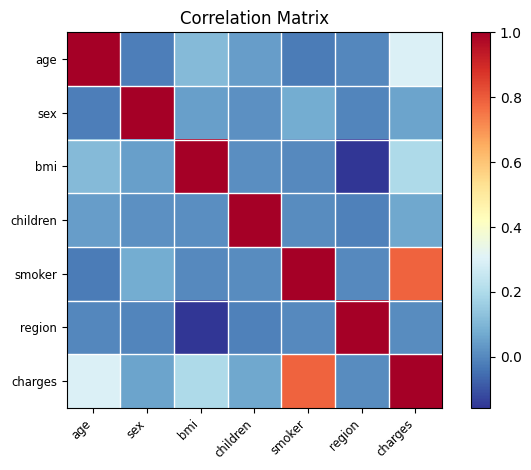

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Tu código sigue aquí
#En este caso vemos baja correlación entre las variables. Dependiendo del
#algoritmo que utilicemos podría ser una buena decisión eliminar features que tuvieran alta correlación
corr = data.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

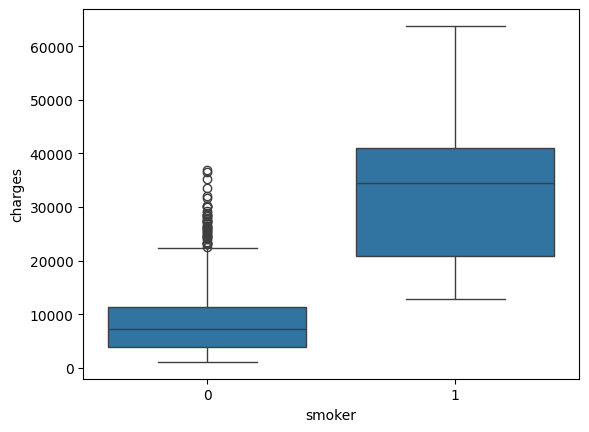

In [33]:
# Grafico de smoker con charges
import seaborn as sns
sns.boxplot(x='smoker', y='charges', data=data);